## Decision trees for predicting Students performance

In this homework, we will use the Students Performance in 2024 JAMB dataset from [Kaggle](https://www.kaggle.com/datasets/idowuadamo/students-performance-in-2024-jamb).

The goal of this homework is to create a regression model for predicting the performance of students on a standardized test (column `'JAMB_Score'`).

In [1]:
!wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

--2024-11-04 21:45:14--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2024-11-04 21:45:14--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: ‘jamb_exam_results.csv’

jamb_exam_results.c 100%[===================>] 382.33K  --.-KB/s    in 0.006s  

2024-11-04 21:45:14 (58.2 MB/s) - ‘jamb_exam_result

In [18]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
%matplotlib inline

### Data cleaning and preparation

First, let's make the names lowercase:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

Preparation:

* Remove the `student_id` column.
* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.


In [3]:
df = pd.read_csv("jamb_exam_results.csv")

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df = df.fillna(0)
del df['student_id']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

In [11]:
y_train[:5]

array([145, 231, 161, 146, 283])

In [12]:
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [13]:
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

### Question 1

Let's train a decision tree regressor to predict the `jamb_score` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `study_hours_per_week`
* `attendance_rate`
* `teacher_quality`
* `distance_to_school`

In [14]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [15]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [16]:
print(export_text(dt, feature_names=dv.feature_names_))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



Answer: `study_hours_per_week`

### Question 2

Train a random forest regressor with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on the validation data?

* 22.13
* 42.13
* 62.13
* 82.12

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
#Train a Random Forest model with these parameters: n_estimators=10, random_state=1, n_jobs=-1
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [ ]:
#Calculate RMSE
y_pred = rf.predict(X_val)
round(np.sqrt(mean_squared_error(y_val, y_pred)),2)

np.float64(42.14)

### Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

In [22]:
scores = []

n_estimators = [10,25,80,200]

for n in n_estimators:
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = round(np.sqrt(mean_squared_error(y_val, y_pred)),3)
    scores.append((n, rmse)) 

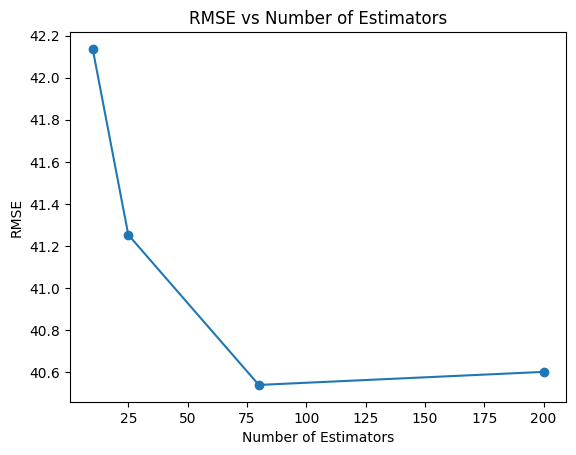

In [26]:
import matplotlib.pyplot as plt

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Estimators')
plt.show()

### Analysis of RMSE vs Number of Estimators

The graph above shows the relationship between the number of estimators in the Random Forest model and the RMSE (Root Mean Squared Error) on the validation dataset. As we can see, the RMSE decreases as the number of estimators increases, 
indicating that the models performance improves with more estimators. However, after a certain point, the RMSE stabilizes and does not improve significantly with additional estimators. 

Our goal is to minimize the RMSE, as a lower RMSE indicates a better fit of the model to the data. From the graph, it appears that the RMSE stops improving significantly after around 80 estimators. Therefore, using more than 80 estimators may not provide substantial benefits in terms of reducing the RMSE.

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25

In [40]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=d,
                                   random_state=1, 
                                   n_jobs=-1)
        
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_val)
        score = round(np.sqrt(mean_squared_error(y_val, y_pred)),3)
        
        scores.append((d, n, score))

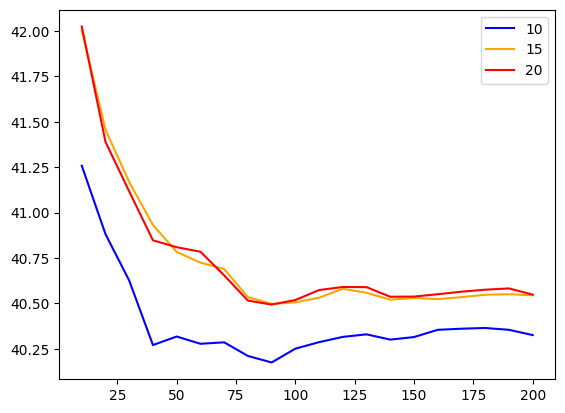

In [41]:
columns = ['max_depth', 'n_estimators', 'rmse']
colors = ['blue', 'orange', 'red']
df_scores = pd.DataFrame(scores, columns=columns)
values = [10, 15, 20, 25]

for d, col in zip(values, colors):
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=d, color=col)

plt.legend()
plt.show()

Answer: `max_depth = 10`


# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `study_hours_per_week`
* `attendance_rate`
* `distance_to_school`
* `teacher_quality`


In [42]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, 
                           random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [45]:
rf.feature_importances_
df_importances = pd.DataFrame()
df_importances['feature'] = dv.feature_names_
df_importances['importance'] = rf.feature_importances_
df_importances.sort_values(by='importance', ascending=False).head().reset_index(drop=True)

,feature,importance
0,study_hours_per_week,0.248354
1,attendance_rate,0.149729
2,distance_to_school,0.136486
3,teacher_quality,0.082682
4,age,0.069311


Answer: `study_hours_per_week`


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

In [46]:
import xgboost as xgb

In [60]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [61]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [62]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100)

y_pred = model.predict(dval)

print("XGboost model with eta:0.3 -> rmse:" + round(np.sqrt(mean_squared_error(y_val, y_pred)),2).astype(str))

XGboost model with eta:0.3 -> rmse:43.42


In [63]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

y_pred = model.predict(dval)

print("XGboost model with eta:0.1 -> rmse:" + round(np.sqrt(mean_squared_error(y_val, y_pred)),2).astype(str))

XGboost model with eta:0.1 -> rmse:41.05


In [64]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [65]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

scores['eta=0.3'] = parse_xgb_output(output)

In [66]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

scores['eta=0.1'] = parse_xgb_output(output)

In [69]:
df_scores

,max_depth,n_estimators,rmse
0,10,10,41.258
1,10,20,40.881
2,10,30,40.625
3,10,40,40.270
4,10,50,40.317
...,...,...,...
75,25,160,40.600
76,25,170,40.624
77,25,180,40.639
78,25,190,40.629


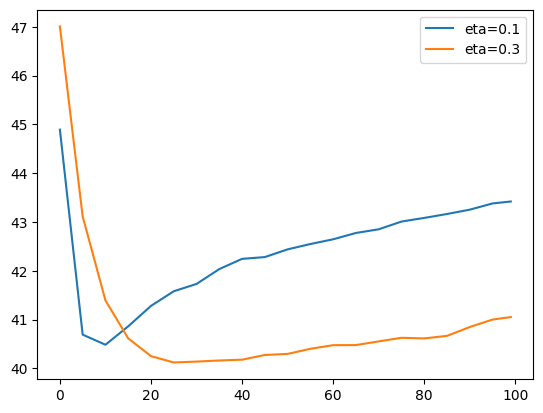

In [68]:
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_auc,label='eta=0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc,label='eta=0.3')
plt.legend()
plt.show()

Answer: eta = 0.3 leads to a better RMSE score